FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    3/30/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM22SP/ABS_RZ*/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/ABS_RHZ_GOM22SP_Pchip_wavelenths.csv'
path_2 = "../../../Data_Thesis/CDOM/ABS_RHZ_GOM22SP_plot.png"
path_3 = '../../../Data_Thesis/CDOM/ABS_RHZ_GOM22SP_outputs.csv'
files

['../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222161_Absorbance__0__182.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222161_Absorbance__1__183.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222161_Absorbance__2__184.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222162_Absorbance__0__197.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222162_Absorbance__1__198.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222162_Absorbance__2__199.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222163_Absorbance__0__185.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222163_Absorbance__1__186.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222163_Absorbance__2__187.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222164_Absorbance__0__194.txt',
 '../../../CDOM_DATA/GOM22SP\\ABS_RZ_GOM22SP_St.13_2221\\222164_Absorbance__1__195.txt',
 '../../../CDOM_DATA/

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
X = .01 # 1 cm wg SN: , Basiclly antything from PW or RHZ
#X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW
#X = .489 # 50 cm lwcc number 2 SN: , Basiclly antything from GOMFASP thats not PW

PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [27]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [28]:
#EDIT HERE
####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[2] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,222161_Absorbance__0__182.txt,222161_Absorbance__1__183.txt,222161_Absorbance__2__184.txt,222162_Absorbance__0__197.txt,222162_Absorbance__1__198.txt,222162_Absorbance__2__199.txt,222163_Absorbance__0__185.txt,222163_Absorbance__1__186.txt,222163_Absorbance__2__187.txt,222164_Absorbance__0__194.txt,...,222264_Absorbance__2__20.txt,222265_Absorbance__0__03.txt,222265_Absorbance__1__04.txt,222265_Absorbance__2__05.txt,222266_Absorbance__0__09.txt,222266_Absorbance__1__10.txt,222266_Absorbance__2__11.txt,222266_Absorbance__3__12.txt,222266_Absorbance__4__13.txt,222266_Absorbance__5__14.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,-171.895920,-137.212740,-112.409430,101.470180,0.000000,89.333370,-174.613460,0.000000,-209.642090,0.000000,...,0.000000,0.000000,0.000000,0.000000,-241.239250,-257.728730,-248.631880,-241.239250,-243.404070,-265.213480
190,-171.895920,-137.212740,-112.409430,101.470180,0.000000,89.333370,-174.613460,0.000000,-209.642090,0.000000,...,0.000000,0.000000,0.000000,0.000000,-241.239250,-257.728730,-248.631880,-241.239250,-243.404070,-265.213480
191,0.000000,403.878112,125.266548,31.664587,86.323237,52.193403,74.506137,220.112830,38.662872,19.424012,...,-195.658650,0.000000,69.936578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
192,8.963536,54.738085,-35.245160,-66.857867,-13.685968,-6.856019,-62.665842,-43.437571,74.929717,-99.433014,...,0.000000,0.000000,0.000000,0.000000,-387.947788,-385.511208,-365.176843,-392.067822,-376.230054,-379.552663
193,79.882316,-17.090372,0.000000,-36.276999,53.812386,8.304949,45.484888,-21.138567,-48.965273,-7.419062,...,0.000000,0.000000,0.000000,0.000000,-30.321111,-26.669459,-27.761355,-29.637176,-28.473287,-22.977811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-1.821298,-0.073083,-0.687591,2.358340,2.678075,2.376094,3.040835,2.649192,-2.233465,0.804191,...,2.584635,5.436839,3.427995,4.478039,7.803526,10.494689,8.960946,14.181297,11.063254,10.524435
877,0.147462,1.976753,0.777203,2.795846,3.303831,4.700487,1.542062,3.341415,2.339647,1.254356,...,3.624766,6.818584,6.167400,3.908601,12.864316,11.277969,9.923393,11.025789,13.756111,10.284053
878,0.893009,-0.279921,-3.890946,3.733646,3.962466,5.124559,2.735004,-0.711689,-0.083678,-0.483389,...,5.876885,0.397662,-1.646967,0.645506,7.132520,11.805685,11.775464,10.886319,9.889206,11.736816


In [29]:
#EDIT HERE
####################################
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=6).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df

,221461,221462,221463,221464,221465,221466,221467,221561,221562,221563,...,222264,222265,222266,222361,222362,222363,222364,222365,222366,222367
wl,,,,,,,,,,,,,,,,,,,,,
189,86.109170,53.598487,13.879413,33.861777,218.585407,-33.262997,59.133363,-10.110170,5.726793,-208.191200,...,0.000000,0.000000,-249.576110,50.880947,36.080333,-59.494167,41.192993,-34.997923,-193.444323,0.000000
190,86.109170,53.598487,13.879413,33.861777,218.585407,-33.262997,59.133363,-10.110170,5.726793,-208.191200,...,0.000000,0.000000,-249.576110,50.880947,36.080333,-59.494167,41.192993,-34.997923,-193.444323,0.000000
191,74.620026,77.409341,44.624656,29.307862,-26.840113,7.943010,-88.771575,-79.951929,-15.854331,15.728971,...,-204.227726,23.312193,0.000000,-81.172179,-52.279160,40.297586,-2.828477,-14.696297,17.767809,125.477566
192,36.241332,36.063823,10.693231,-170.589456,-7.777978,3.199577,0.296095,111.228306,-94.522701,25.262217,...,0.000000,0.000000,-381.081063,-30.087072,50.870585,1.074661,-77.677582,0.000000,-12.828462,-93.158563
193,8.165728,-32.576783,109.954573,14.388272,151.961707,-174.643095,-43.877340,-242.094427,-136.071900,25.564145,...,0.000000,0.000000,-27.640033,-41.542294,-35.885046,-26.427677,-4.990995,60.171513,-69.166170,-28.706569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,15.689049,-2.327502,10.479498,5.401740,1.684700,-1.692917,-2.687236,14.093622,12.736150,-0.120058,...,1.214572,4.447624,10.504691,3.461812,2.264316,-6.460878,4.170825,-7.827157,0.778517,13.887263
877,13.471399,-3.297347,9.462628,0.842767,5.292104,0.208109,-1.636531,-8.803607,1.763899,-0.711251,...,2.758792,5.631528,11.521939,-5.342426,-2.039790,-4.638143,-5.520773,0.986717,4.876262,17.171600
878,13.504466,-0.300455,6.624446,-0.594197,1.202809,-3.191936,-5.474936,-1.831039,3.360746,-0.404001,...,4.672237,-0.201266,10.537668,-1.040252,-2.059454,-0.641252,-0.156070,2.647210,5.908585,22.773037


In [30]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

In [31]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

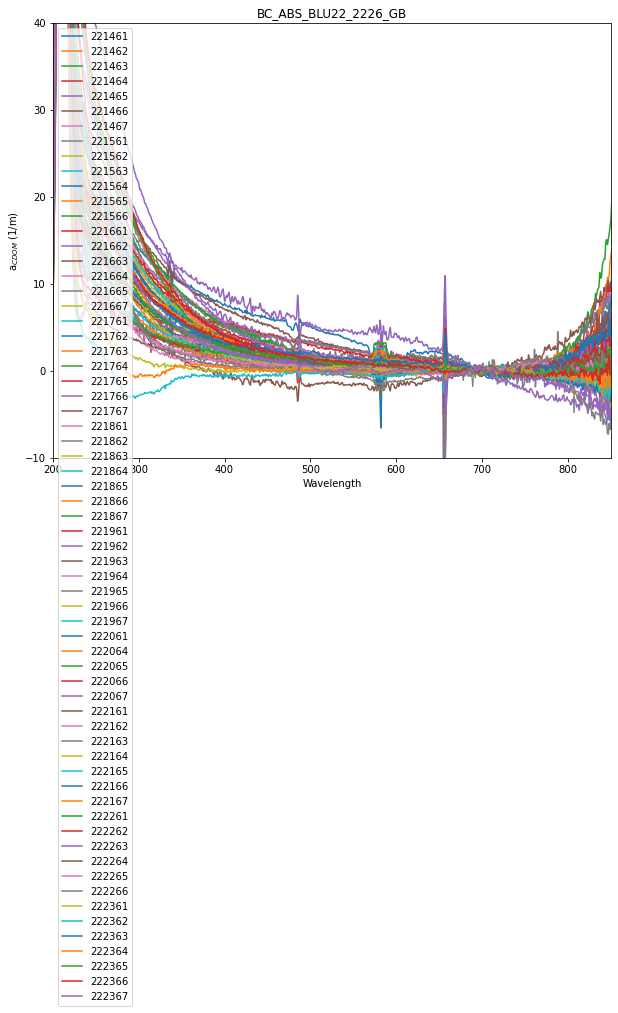

In [32]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-10,40)
ax.set_xlim(200,850)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")

plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [10]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [11]:
#EDIT HERE
####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[2] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
names = d.columns.str.rsplit('_', n=6).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = df.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,221461,221462,221463,221464,221465,221466,221467,221561,221562,221563,...,222265,222266,222361,222362,222363,222364,222365,222366,222367,wl
wl,,,,,,,,,,,,,,,,,,,,,
189.2794,86.109170,53.598487,13.879413,33.861777,218.585407,-33.262997,59.133363,-10.110170,5.726793,-208.191200,...,0.000000,-249.576110,50.880947,36.080333,-59.494167,41.192993,-34.997923,-193.444323,0.000000,189.2794
189.6618,86.109170,53.598487,13.879413,33.861777,218.585407,-33.262997,59.133363,-10.110170,5.726793,-208.191200,...,0.000000,-249.576110,50.880947,36.080333,-59.494167,41.192993,-34.997923,-193.444323,0.000000,189.6618
190.0441,86.109170,53.598487,13.879413,33.861777,218.585407,-33.262997,59.133363,-10.110170,5.726793,-208.191200,...,0.000000,-249.576110,50.880947,36.080333,-59.494167,41.192993,-34.997923,-193.444323,0.000000,190.0441
190.4264,45.008297,0.000000,-118.673590,-115.656660,161.778073,-46.236563,15.399393,10.816423,76.402025,-19.391260,...,0.000000,-110.344407,29.985060,0.000000,-30.176977,43.925887,-43.987300,-12.528320,-83.414660,190.4264
190.8087,138.870900,129.505367,149.802473,120.968913,-57.997217,-55.095437,-177.822307,-96.741353,-51.203367,123.041613,...,0.000000,0.000000,0.000000,14.516577,15.560603,33.800363,21.602140,8.835843,54.987963,190.8087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,17.986430,4.943773,1.589070,-2.740570,3.638740,-3.838333,-9.503713,-9.281090,-2.398958,3.968837,...,5.565583,11.726108,0.307067,0.660193,-5.197103,1.719573,-6.763143,1.827047,13.150130,880.5978
880.8884,13.426490,-1.312710,9.895223,3.999543,4.083987,-1.742603,-1.757957,-5.496493,5.638512,1.765633,...,3.600357,12.532158,3.976513,1.665837,-2.786630,0.713930,4.245197,1.243620,21.110833,880.8884
881.1790,16.251503,5.511847,8.881903,0.353127,6.947383,-0.330097,-1.957550,-0.652517,6.444562,-0.422217,...,3.116727,18.969043,3.270260,0.928877,-3.538943,0.437570,-5.926387,1.965227,13.572347,881.1790


In [12]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [13]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 275_295 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


In [15]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [16]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (.001, 11, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 275_295 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [20]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

!!! WARNING !!! 275_700 has a bad R2 !!!


In [21]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
221461,NaN,0.000024,0.003380,NaN,0.005235,0.258740,29.105512,26.621844,23.603915,18.508506,17.353073,29.910449,26.893665,23.549784,18.444893,17.337931,0.007209,0.020231,NaN
221462,0.017072,0.004112,0.009633,5.332874,0.164430,2.608657,17.872826,10.240938,4.078907,-0.903662,-1.400632,20.220105,10.484558,3.907004,-0.781848,-1.268737,0.426828,0.063032,-1.296132
221463,0.010947,0.008740,0.009824,3.395430,1.478705,2.662167,29.032930,22.101240,15.248537,7.331788,6.129084,31.532462,22.586554,15.004393,7.391081,6.269758,0.889703,0.555452,-1.027827
221464,0.015997,0.011117,0.008952,5.038313,2.138347,2.340322,15.838526,9.437184,4.082724,-0.520182,-1.015246,17.938510,9.681326,3.907696,-0.424427,-0.899354,1.241797,0.913698,-1.302614
221465,0.009180,0.000018,0.007480,2.786309,0.005326,1.782873,20.675655,16.118218,11.339561,5.197919,4.148872,22.377602,16.519849,11.185994,5.204456,4.224731,0.002355,0.002987,-0.954866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222363,0.011042,0.001431,NaN,3.416650,0.018656,NaN,6.167256,2.775507,-0.567064,-4.406861,-4.986520,7.383467,3.014794,-0.678679,-4.373167,-4.915281,0.254732,0.017052,-0.329988
222364,NaN,0.080855,NaN,NaN,NaN,NaN,-0.140657,-0.144042,-0.148876,-0.159990,-0.163371,-0.430458,-0.284307,-0.204680,-0.163296,-0.160269,19980.164005,-1.841865,NaN
222365,0.012484,0.000018,NaN,3.905864,0.004945,NaN,13.016192,8.485822,4.229978,-0.257272,-0.871927,14.628179,8.766389,4.087193,-0.200175,-0.777068,0.001971,0.002060,-0.562465
